# Session 3 further work

In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 3. Grids

### Question 1

Text(0.5, 1.0, 'Linear plot')

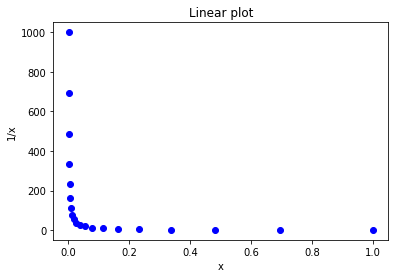

In [2]:
N = 20
x = np.logspace(-3,0,num=N)
plt.plot(x,1/x,'bo')
plt.xlabel("x")
plt.ylabel("1/x")
plt.title("Linear plot")

Text(0.5, 1.0, 'Semi-log plot')

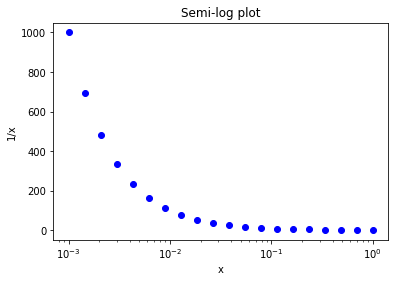

In [3]:
plt.semilogx(x,1/x,'bo')
plt.xlabel("x")
plt.ylabel("1/x")
plt.title("Semi-log plot")

Text(0.5, 1.0, 'Log-log plot')

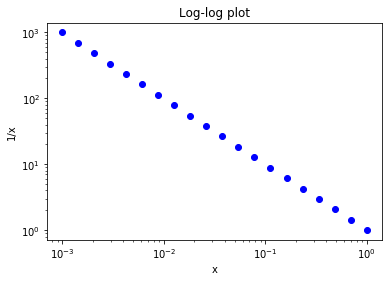

In [4]:
plt.loglog(x,1/x,'bo')
plt.xlabel("x")
plt.ylabel("1/x")
plt.title("Log-log plot")

The linear axes show the form of the function clearly (visually intuitive) but the compression of points is confusing.  The semi-log plot shows the form of the function reasonably clearly, but the 1/x form is distorted.  The log-log plot shows the data points most clearly, and is clear if the axes are carefully checked.

### Question 2

Text(0.5, 1.0, 'Archimedes spiral')

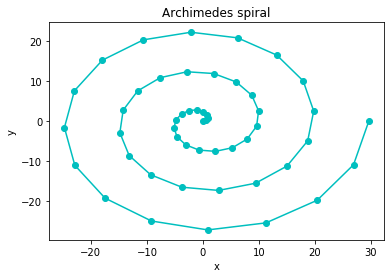

In [7]:
# Define parameters for Archimedes spiral, r = a + b theta
a = 0.0
b = 1./2*np.pi
theta = np.linspace(0,6*np.pi)
r = a + b*theta
x = r*np.cos(theta)
y = r*np.sin(theta)
plt.plot(x,y,'co-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Archimedes spiral")

Text(0.5, 1.0, 'Logarithmic spiral')

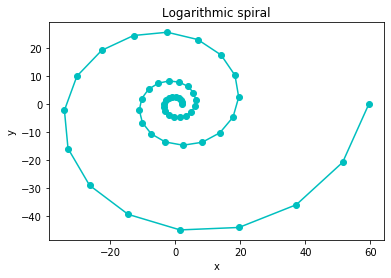

In [8]:
# Parameters for logarithmic spiral
a_log = 2
b_log = 0.18
r_log = a_log*np.exp(b_log*theta)
x_log = r_log*np.cos(theta)
y_log = r_log*np.sin(theta)
plt.plot(x_log,y_log,'co-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Logarithmic spiral")

For these plots, we would benefit from the inverse of the usual logarithmic scale: we want fewer points near zero and more as theta increases.

### Question 3

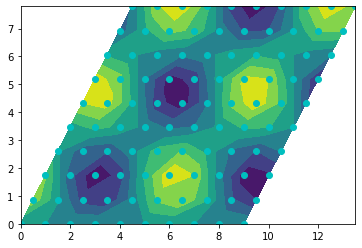

In [13]:
N = 10
avec = np.array((1,0))
bvec = np.array((0.5,0.866))
pos_nm = np.zeros((2,N,N))
for i in range(N):
    for j in range(N):
        pos_nm[0,i,j] = i*avec[0] + j*bvec[0]
        pos_nm[1,i,j] = i*avec[1] + j*bvec[1]
surf = np.cos(pos_nm[0])*np.sin(pos_nm[1])
plt.contourf(pos_nm[0],pos_nm[1],surf)
plt.plot(pos_nm[0],pos_nm[1],'co')

## 4. Differentiation

### Question 1

In [15]:
def centredFD(fun,x,dx):
    """Calculate centred first order finite-difference of given function
    Inputs:
    fun (function to be differentiated)
    x   
    dx  (finite difference)
    Returns:
    finite difference"""
    df = fun(x + dx) - fun(x - dx)
    return df/(2*dx)

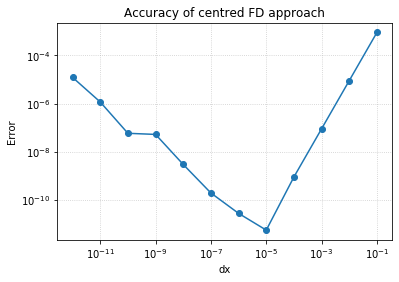

In [16]:
x = 1.0
N = 12
dx_array = np.logspace(-N,-1,N)
results = np.zeros(N)
for i, dx in enumerate(dx_array):
    results[i] = abs(centredFD(np.sin,x,dx) - np.cos(x))
plt.loglog(dx_array,results,'o-')
plt.grid(True,linestyle=':')
plt.xlabel('dx')
plt.ylabel('Error')
plt.title('Accuracy of centred FD approach')
plt.grid(True, alpha=0.7, linestyle=':', which='both', axis='both')

Notice how the error is smaller than for the forward FD approach, but that the overall accuracy decreases beyond a certain value of dx.

#### Question 2

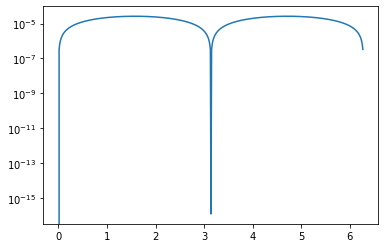

In [14]:
dx = 2*np.pi/500
x_roll = np.arange(0,2*np.pi,dx)
cos_roll= np.cos(x_roll)
sin_roll = np.sin(x_roll)
fdc_roll = (np.roll(cos_roll,-1) - np.roll(cos_roll,1))/(2*dx)
# we know that the differential of cos is -sin, so we add sin here to find the difference
plt.semilogy(x_roll,abs(fdc_roll+sin_roll))

Note that if you choose a simple value of `dx` like 0.01 (as I did at first) then the differentials at the *ends* of the array are wrong because the array does not wrap quite perfectly with the period of the function.  The ends of arrays when doing this kind of finite difference need care...

#### Question 3

In [18]:
def fd_f(f,x,dx):
    """Implements forward finite difference"""
    return (f(x + dx) - f(x)) / dx

def fd_b(f,x,dx):
    """Implements backward finite difference"""
    return (f(x) - f(x - dx)) / dx

def fd_c(f,x,dx):
    """Implements centred finitd difference"""
    return (f(x + dx) - f(x - dx))/(2*dx)
def d2f_cent(f,x,dx):
    """Implements the centred finite difference second derivative"""
    return (f(x + dx) - 2 * f(x) + f(x - dx)) / (dx * dx)

In [19]:
x = 1.0
exact = -np.sin(x)
print("Exact second derivative is ",exact)
for dx in [0.1**i for i in range(1,6)]:
    second = d2f_cent(np.sin,x,dx)
    fd_f_f = (fd_f(np.sin,x+dx,dx) - fd_f(np.sin,x,dx))/dx
    fd_f_b = (fd_f(np.sin,x,dx) - fd_b(np.sin,x,dx))/dx
    fd_b_b = (fd_b(np.sin,x,dx) - fd_b(np.sin,x-dx,dx))/dx
    print("dx is ",dx," second, ff, fb, bb are ",second, fd_f_f, fd_f_b, fd_b_b)

Exact second derivative is  -0.8414709848078965
dx is  0.1  second, ff, fb, bb are  -0.8407699926874289 -0.8904649347747928 -0.840769992687429 -0.782674354754731
dx is  0.010000000000000002  second, ff, fb, bb are  -0.8414639725740077 -0.846824787710254 -0.841463972574008 -0.8360190117384646
dx is  0.0010000000000000002  second, ff, fb, bb are  -0.8414709148363283 -0.8420107960871446 -0.8414709148363284 -0.8409301917033927
dx is  0.00010000000000000002  second, ff, fb, bb are  -0.8414709817827767 -0.8415250163373854 -0.8414709817827769 -0.8414169583303986
dx is  1.0000000000000003e-05  second, ff, fb, bb are  -0.8414713370541445 -0.8414757779462432 -0.8414713370541447 -0.8414646757159969


## 5. Integration

### Question 1

In [32]:
def simpson_int(f,a,b,N):
    """Implement integration using Simpson's rule
    Inputs:
    f    (function to be integrated)
    a, b (limits in integration)
    N    (number of points, must be even)
    Returns value of integral"""
    # End points
    integral= f(a) + f(b)
    dx = (b-a)/N
    for i in range(1,N,2): 
        integral += 4*f(a+i*dx)
    for i in range(2,N-1,2):
        integral += 2*f(a+i*dx)
    integral *= dx/3.0
    return integral

In [33]:
def xcos(x):
    """Calculate x*cos(x)"""
    return x*np.cos(x)
print("Exact answer for integral of x cos(x) from 0 to 1 is ",np.cos(1)+np.sin(1)-1)
for i in [6,10,20,50,100,200,500,1000]:
    print("Integral of x cos(x) from 0 to 1 is ",simpson_int(xcos,0,1,i)," with ",i," points")

Exact answer for integral of x cos(x) from 0 to 1 is  0.38177329067603627
Integral of x cos(x) from 0 to 1 is  0.38178285423408026  with  6  points
Integral of x cos(x) from 0 to 1 is  0.38177452640225557  with  10  points
Integral of x cos(x) from 0 to 1 is  0.3817733678114146  with  20  points
Integral of x cos(x) from 0 to 1 is  0.3817732926500038  with  50  points
Integral of x cos(x) from 0 to 1 is  0.3817732907994031  with  100  points
Integral of x cos(x) from 0 to 1 is  0.3817732906837463  with  200  points
Integral of x cos(x) from 0 to 1 is  0.38177329067623395  with  500  points
Integral of x cos(x) from 0 to 1 is  0.3817732906760493  with  1000  points


Clearly, Simpson's rule is far better than the others; as it requires the *same* number of function evaluations, it is worth using every time.

#### Question 2

In [20]:
def integrate_2d(fun,x,y,dx,dy):
    """Perform simple 2D integration
    
    Inputs:
    fun    Function to be integrated
    x, y   2D arrays of points (e.g. from np.meshgrid)
    dx, dy Grid spacings
    """
    return dx*dy*np.sum(fun(x,y))

#### Question 3

In [27]:
def test_fun(x,y):
    """Test function to integrate"""
    return np.cos(x)*np.cos(y)
N = 1001
maxval = np.pi/4
x = np.linspace(0,maxval,N)
y = np.linspace(0,maxval,N)
delta = maxval/(N-1)
x2D, y2D = np.meshgrid(x,y)
print("Integral is: ", integrate_2d(test_fun,x2D,y2D,delta,delta))

Integral is:  0.500948457404405


I found that quite a small grid spacing is needed to get an answer accurate to two decimal places.

## 5.2 Library routines


#### Question 1

In [29]:
def xcos(x):
    """Calculate x*cos(x)"""
    return x*np.cos(x)

In [30]:
from scipy import integrate
int, err = integrate.quad(xcos,0,1)
print("Scipy quad gives ",int," with estimated error ",err)

Scipy quad gives  0.3817732906760362  with estimated error  4.23853497495448e-15


In [31]:
def xcosa(x,a):
    """Calculate x*cos(a*x)"""
    return x*np.cos(a*x)
int, err = integrate.quad(xcosa,0,1,args=(1.0))
print("Scipy quad gives ",int," with estimated error ",err)

Scipy quad gives  0.3817732906760362  with estimated error  4.23853497495448e-15
